## Read datasets

In [61]:
import pandas as pd
random_state = 42
import warnings
warnings.filterwarnings('ignore')
from source.read_data import read_artificial_data, read_spam
from source.feature_selection_methods import change_data_with_selected_features, change_all_datasets
from source.feature_selection_methods import boruta_select_features, chi2_select_features, rfe_select_features, gini_select_features, ss_select_features, l1_select_features
from source.metrics import balanced_accuracy, artificial_score, spam_score
from source.models import train_model, sequential_search_train_model
from source.number_of_features import search_best_features, search_best_C, plot_results, plot_results_best_C

ImportError: cannot import name 'plot_results_best_C' from 'source.number_of_features' (c:\Users\marty\OneDrive\Dokumenty\notatki\8 semestr\AML\Projects\aml_project2\source\number_of_features.py)

### Artificial dataset

In [2]:
art_train_X, art_train_y, art_val_X, art_val_y, art_test_data = read_artificial_data("data")
art_train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
968,494,476,461,463,506,480,463,477,509,483,...,500,471,532,274,486,502,489,487,504,461
240,489,455,479,501,542,473,534,475,482,478,...,494,476,468,619,519,491,469,505,536,495
819,481,467,597,479,469,483,467,475,497,490,...,519,473,503,547,477,504,478,504,488,490
692,480,460,558,477,555,470,528,477,490,480,...,490,477,469,368,494,530,477,488,512,484
420,477,488,492,496,462,479,447,476,450,473,...,519,476,490,716,594,499,486,486,472,491


### Spam dataset
Transformed with use of [repo](https://github.com/edumunozsala/Intro-NLP-Text-Classification/blob/master/Intro_NLP_1_TFIDF_Text_Classification.ipynb)

In [3]:
spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data = read_spam("data")
spam_train_X.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection methods
1. Boruta
2. Chi-squared
3. Recursive Feature Elimination
4. Gini
5. Sequential Forward Search
6. Sequential Backward Search
7. L1 

## Models

In [44]:
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
no_features = 10

### Artificial data

#### 1. Boruta

In [10]:
%%capture
art_boruta_features=boruta_select_features(art_train_X, art_train_y)
art_train_X_boruta2, art_val_X_boruta2, art_test_data_boruta2 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_boruta_features, boruta=True)

In [11]:
%%capture 
all_scores_artificial_boruta=pd.DataFrame(index=models, columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'artificial')
    all_scores_artificial_boruta.loc[model]=[BA, score]

#### 2. Chi-squared

In [45]:
%%capture
art_chi2_features=chi2_select_features(art_train_X, art_train_y, no_features)
art_train_X_chi2, art_val_X_chi2, art_test_data_chi2 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_chi2_features)

In [46]:
%%capture 
all_scores_artificial_chi=pd.DataFrame(index=models, columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
    all_scores_artificial_chi.loc[model]=[BA, score]

#### 3. Recursive Feature Elimination

In [47]:
%%capture
art_rfe_features=rfe_select_features(art_train_X, art_train_y, no_features)
art_train_X_rfe, art_val_X_rfe, art_test_data_rfe=change_all_datasets(art_train_X, art_val_X, art_test_data, art_rfe_features)

In [48]:
%%capture 
all_scores_artificial_rfe=pd.DataFrame(index=models, columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'artificial')
    all_scores_artificial_rfe.loc[model]=[BA, score]

#### 4. Gini

In [49]:
%%capture
art_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_feats=no_features)
art_train_X_gini, art_val_X_gini, art_test_data_gini=change_all_datasets(art_train_X, art_val_X, art_test_data, art_gini_features)

In [50]:
%%capture 
all_scores_artificial_gini=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
    all_scores_artificial_gini.loc[model]=[BA, score]

#### 5. Sequential Forward Search

In [ ]:
#%%capture 
#all_scores_artificial_sfs=pd.DataFrame(index=models, columns=['BA sfs', 'Score sfs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, art_train_X, art_train_y, art_val_X, art_val_y,'artificial', no_features, "forward")
#    all_scores_artificial_sfs.loc[model]=[BA, score]

In [ ]:
#all_scores_artificial_sfs.to_csv("scores/all_scores_artificial_sfs.csv")

#### 6. Sequential Backward Search

In [12]:
#%%capture 
#all_scores_artificial_sbs=pd.DataFrame(index=models, columns=['BA sbs', 'Score sbs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, art_train_X, art_train_y, art_val_X, art_val_y,'artificial', no_features, "backward")
#    all_scores_artificial_sbs.loc[model]=[BA, score]

In [ ]:
#all_scores_artificial_sbs.to_csv("scores/all_scores_artificial_sbs.csv")

#### 7. L1 

In [19]:
%%capture
art_l1_features = l1_select_features(art_train_X, art_train_y)
art_train_X_l1, art_val_X_l1, art_test_data_l1 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_l1_features)

In [20]:
%%capture 
all_scores_artificial_l1=pd.DataFrame(index=models, columns=['BA l1', 'Score l1'])
for model in models:
    BA, score=train_model(model, art_train_X_l1, art_train_y, art_val_X_l1, art_val_y, 'spam')
    all_scores_artificial_l1.loc[model]=[BA, score]

#### Artificial - results

In [51]:
all_results_artificial=pd.concat([all_scores_artificial_boruta, all_scores_artificial_chi, all_scores_artificial_rfe, all_scores_artificial_gini, all_scores_artificial_l1], axis=1)
all_results_artificial

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini,BA l1,Score l1
xgb,0.870046,0.838046,0.854742,0.844742,0.502501,0.492501,0.809807,0.799807,0.812495,0.778595
lda,0.545198,0.513198,0.557288,0.547288,0.485109,0.475109,0.549974,0.539974,0.534595,0.500695
svc,0.846978,0.814978,0.821372,0.811372,0.480483,0.470483,0.766135,0.756135,0.631855,0.597955
lr,0.547511,0.515511,0.557288,0.547288,0.482721,0.472721,0.557288,0.547288,0.537058,0.503158
rf,0.874747,0.842747,0.852204,0.842204,0.497199,0.487199,0.829812,0.819812,0.66455,0.63065
dt,0.795104,0.763104,0.82011,0.81011,0.507277,0.497277,0.729864,0.719864,0.780701,0.746801
knn,0.87736,0.84536,0.887287,0.877287,0.492723,0.482723,0.852354,0.842354,0.719637,0.685737


In [52]:
all_results_artificial.to_csv("scores/all_results_artificial.csv")

### Spam dataset

In [24]:
no_features = 100

#### 1. Boruta

In [25]:
%%capture
spam_boruta_features=boruta_select_features(spam_train_X, spam_train_y)
spam_train_X_boruta2, spam_val_X_boruta2, spam_test_data_boruta2 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_boruta_features, boruta=True)

In [26]:
%%capture 
all_scores_spam_boruta=pd.DataFrame(index=models, columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, spam_train_X_boruta2, spam_train_y, spam_val_X_boruta2, spam_val_y, 'spam')
    all_scores_spam_boruta.loc[model]=[BA, score]

#### 2. Chi-squared

In [27]:
%%capture
spam_chi2_features=chi2_select_features(spam_train_X, spam_train_y, no_features)
spam_train_X_chi2, spam_val_X_chi2, spam_test_data_chi2 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_chi2_features)

In [28]:
%%capture 
all_scores_spam_chi=pd.DataFrame(index=models, columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, spam_train_X_chi2, spam_train_y, spam_val_X_chi2, spam_val_y, 'spam')
    all_scores_spam_chi.loc[model]=[BA, score]

#### 3. Recursive Feature Elimination

In [29]:
%%capture
spam_rfe_features=rfe_select_features(spam_train_X, spam_train_y, no_features)
spam_train_X_rfe, spam_val_X_rfe, spam_test_data_rfe=change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_rfe_features)

In [30]:
%%capture 
all_scores_spam_rfe=pd.DataFrame(index=models, columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, spam_train_X_rfe, spam_train_y, spam_val_X_rfe, spam_val_y, 'spam')
    all_scores_spam_rfe.loc[model]=[BA, score]

#### 4. Gini

In [32]:
%%capture
spam_gini_features=gini_select_features(spam_train_X, spam_train_y, depth=3, if_less=True, num_feats=no_features)
spam_train_X_gini, spam_val_X_gini, spam_test_data_gini=change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_gini_features)

In [33]:
%%capture 
all_scores_spam_gini=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, spam_train_X_gini, spam_train_y, spam_val_X_gini, spam_val_y, 'spam')
    all_scores_spam_gini.loc[model]=[BA, score]

#### 5. Sequential Forward Search

In [ ]:
#%%capture 
#all_scores_spam_sfs=pd.DataFrame(index=models, columns=['BA sfs', 'Score sfs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, spam_train_X, spam_train_y, spam_val_X, spam_val_y,'spam', no_features, "forward")
#    all_scores_spam_sfs.loc[model]=[BA, score]

In [ ]:
#all_scores_spam_sfs.to_csv("scores/all_scores_spam_sfs.csv")

#### 6. Sequential Backward Search

In [ ]:
#%%capture 
#all_scores_spam_sbs=pd.DataFrame(index=models, columns=['BA sbs', 'Score sbs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, spam_train_X, spam_train_y, spam_val_X, spam_val_y,'spam', no_features, "backward")
#    all_scores_spam_sbs.loc[model]=[BA, score]

In [ ]:
#all_scores_spam_sbs.to_csv("scores/all_scores_spam_sbs.csv")

#### 7. L1 

In [37]:
%%capture
spam_l1_features = l1_select_features(spam_train_X, spam_train_y)
spam_train_X_l1, spam_val_X_l1, spam_test_data_l1 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_l1_features)

In [38]:
%%capture 
all_scores_spam_l1=pd.DataFrame(index=models, columns=['BA l1', 'Score l1'])
for model in models:
    BA, score=train_model(model, spam_train_X_l1, spam_train_y, spam_val_X_l1, spam_val_y, 'spam')
    all_scores_spam_l1.loc[model]=[BA, score]

#### Spam results

In [39]:
all_results_spam=pd.concat([all_scores_spam_boruta, all_scores_spam_chi, all_scores_spam_rfe, all_scores_spam_gini, all_scores_spam_l1], axis=1)
all_results_spam

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini,BA l1,Score l1
xgb,0.90708,0.90268,0.892357,0.892357,0.908991,0.908991,0.894929,0.894929,0.812249,0.812249
lda,0.908991,0.904591,0.894243,0.894243,0.921166,0.921166,0.892969,0.892969,0.687874,0.687874
svc,0.937874,0.933474,0.95583,0.95583,0.939809,0.939809,0.942357,0.942357,0.832754,0.832754
lr,0.911538,0.907138,0.876286,0.876286,0.917957,0.917957,0.890397,0.890397,0.65196,0.65196
rf,0.926923,0.922523,0.884689,0.884689,0.911563,0.911563,0.898775,0.898775,0.812249,0.812249
dt,0.876384,0.871984,0.852033,0.852033,0.862886,0.862886,0.856541,0.856541,0.812249,0.812249
knn,0.83976,0.83536,0.832092,0.832092,0.849388,0.849388,0.828883,0.828883,0.80904,0.80904


In [40]:
all_results_spam.to_csv("scores/all_results_spam.csv")

### Number of features

In [53]:
print('boruta')
print(f'original: {art_train_X.shape}, boruta: {art_train_X_boruta2.shape}')
print(f'original: {spam_train_X.shape}, boruta: {spam_train_X_boruta2.shape}')
print('chi2')
print(f'original: {art_train_X.shape}, chi2: {art_train_X_chi2.shape}')
print(f'original: {spam_train_X.shape}, chi2: {spam_train_X_chi2.shape}')
print('rfe')
print(f'original: {art_train_X.shape}, rfe: {art_train_X_rfe.shape}')
print(f'original: {spam_train_X.shape}, rfe: {spam_train_X_rfe.shape}')
print('gini')
print(f'original: {art_train_X.shape}, gini: {art_train_X_gini.shape}')
print(f'original: {spam_train_X.shape}, gini: {spam_train_X_gini.shape}')
print('l1')
print(f'original: {art_train_X.shape}, l1: {art_train_X_l1.shape}')
print(f'original: {spam_train_X.shape}, l1: {spam_train_X_l1.shape}')

boruta
original: (1600, 500), boruta: (1600, 21)
original: (3657, 7005), boruta: (3657, 144)
chi2
original: (1600, 500), chi2: (1600, 10)
original: (3657, 7005), chi2: (3657, 100)
rfe
original: (1600, 500), rfe: (1600, 10)
original: (3657, 7005), rfe: (3657, 100)
gini
original: (1600, 500), gini: (1600, 10)
original: (3657, 7005), gini: (3657, 100)
l1
original: (1600, 500), l1: (1600, 439)
original: (3657, 7005), l1: (3657, 5)


## Select number of features for chi2, rfe and gini
Boruta method chooses the optimal numer of features itself, and sfs and sbs are to computationally expensive, and for L1 we perform a seperate experiment with best C value search.

### Artificial

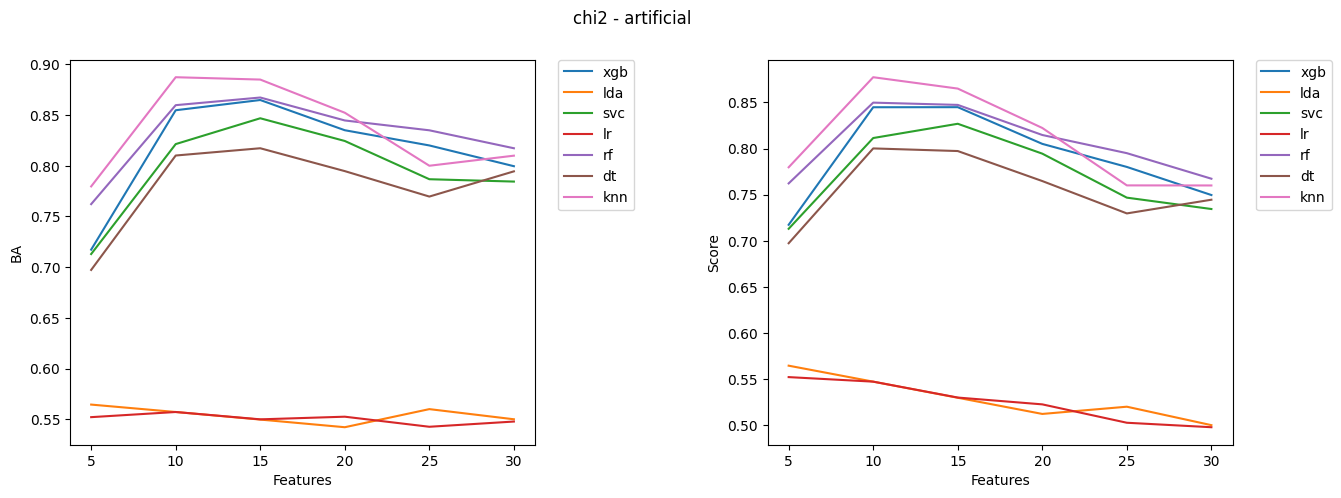

In [ ]:
end_scores_chi2_art = search_best_features([5, 10, 15, 20, 25, 30], 'chi2', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
plot_results(end_scores_chi2_art, "chi2 - artificial")

Fitting estimator with 500 features.
Fitting estimator with 490 features.
Fitting estimator with 480 features.
Fitting estimator with 470 features.
Fitting estimator with 460 features.
Fitting estimator with 450 features.
Fitting estimator with 440 features.
Fitting estimator with 430 features.
Fitting estimator with 420 features.
Fitting estimator with 410 features.
Fitting estimator with 400 features.
Fitting estimator with 390 features.
Fitting estimator with 380 features.
Fitting estimator with 370 features.
Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
F

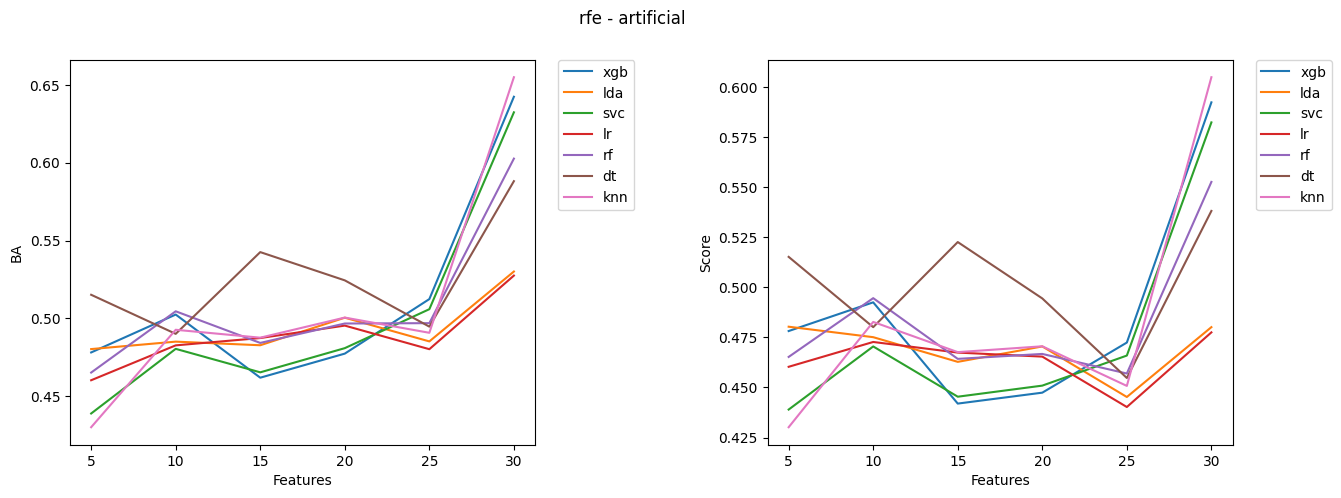

In [ ]:
end_scores_rfe_art = search_best_features([5, 10, 15, 20, 25, 30], 'rfe', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
plot_results(end_scores_rfe_art , "rfe - artificial")

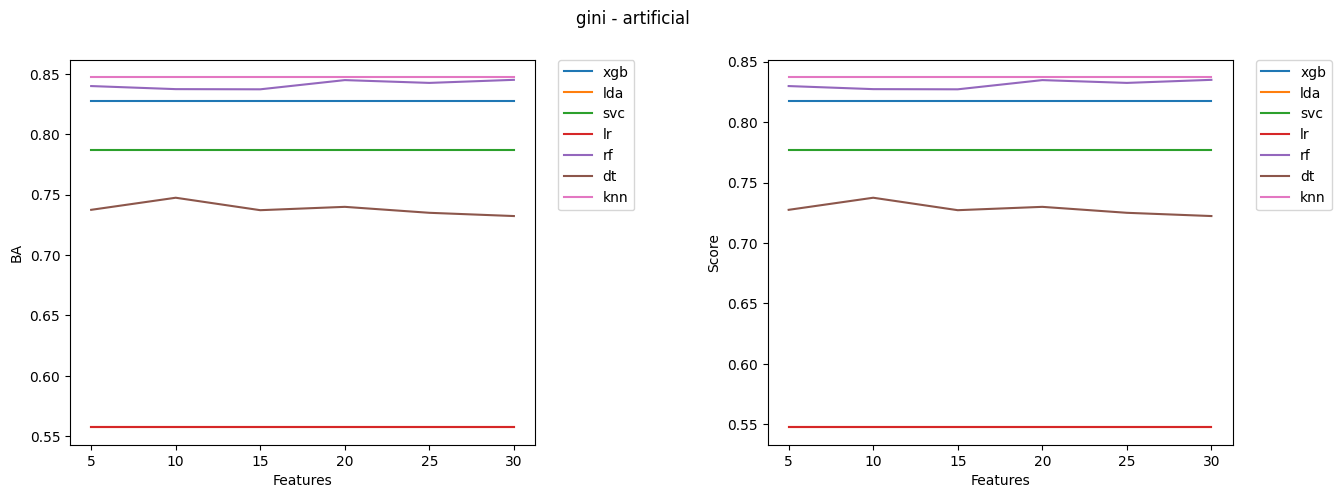

In [55]:
end_scores_gini_art = search_best_features([5, 10, 15, 20, 25, 30], 'gini', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
plot_results(end_scores_gini_art,  "gini - artificial")

In [60]:
end_scores_gini_art

,model,features,BA,Score
0,xgb,5,0.827274,0.817274
1,xgb,10,0.827274,0.817274
2,xgb,15,0.827274,0.817274
3,xgb,20,0.827274,0.817274
4,xgb,25,0.827274,0.817274
5,xgb,30,0.827274,0.817274
6,lda,5,0.557513,0.547513
7,lda,10,0.557513,0.547513
8,lda,15,0.557513,0.547513
9,lda,20,0.557513,0.547513


For L1 we look for best C value instead of number of features - the smaller the C the fewer features selected.

In [65]:
import matplotlib.pyplot as plt
def  plot_results_best_C(end_scores, title):
    models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)
    fig.suptitle(title)
    for i in range(len(models)):
        model_scores = end_scores[end_scores['model']==models[i]]
        ax1.plot(model_scores['C'], model_scores['BA'], label=models[i])
        ax2.plot(model_scores['C'], model_scores['Score'], label=models[i])
    ax1.set_xlabel('C')
    ax1.set_ylabel('BA')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax2.set_xlabel('C')
    ax2.set_ylabel('Score')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

KeyError: 'features'

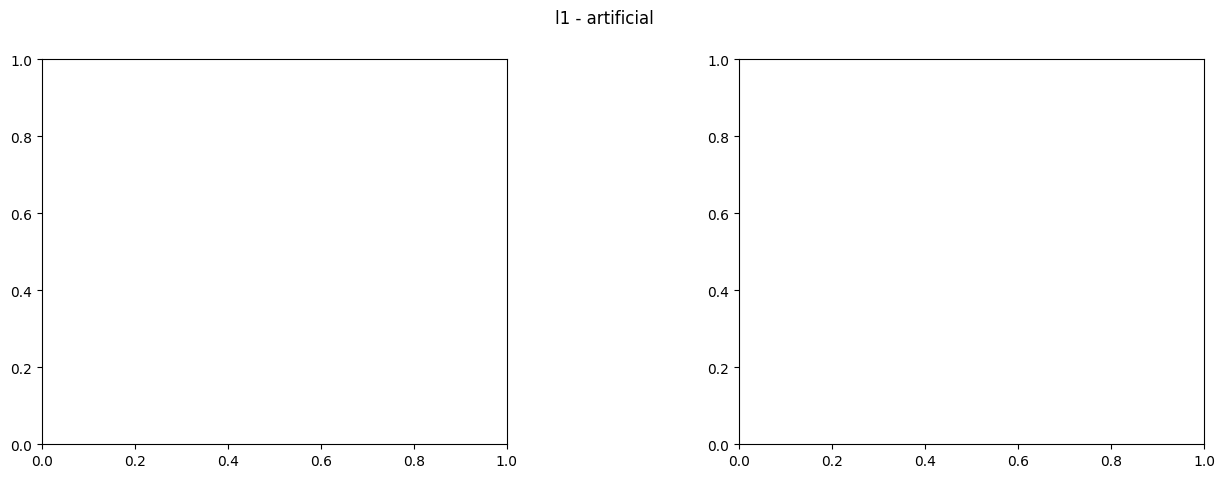

In [58]:
end_scores_l1_art = search_best_C([0.005, 0.01, 0.015, 0.02, 0.025, 0.03], art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')

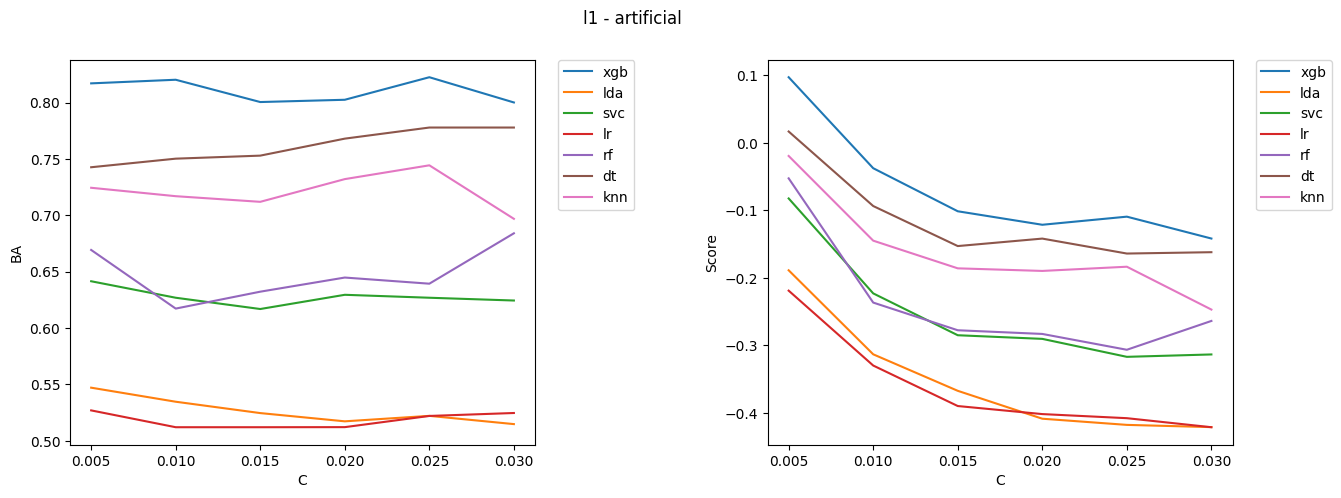

In [66]:
plot_results_best_C(end_scores_l1_art, "l1 - artificial")

### Spam

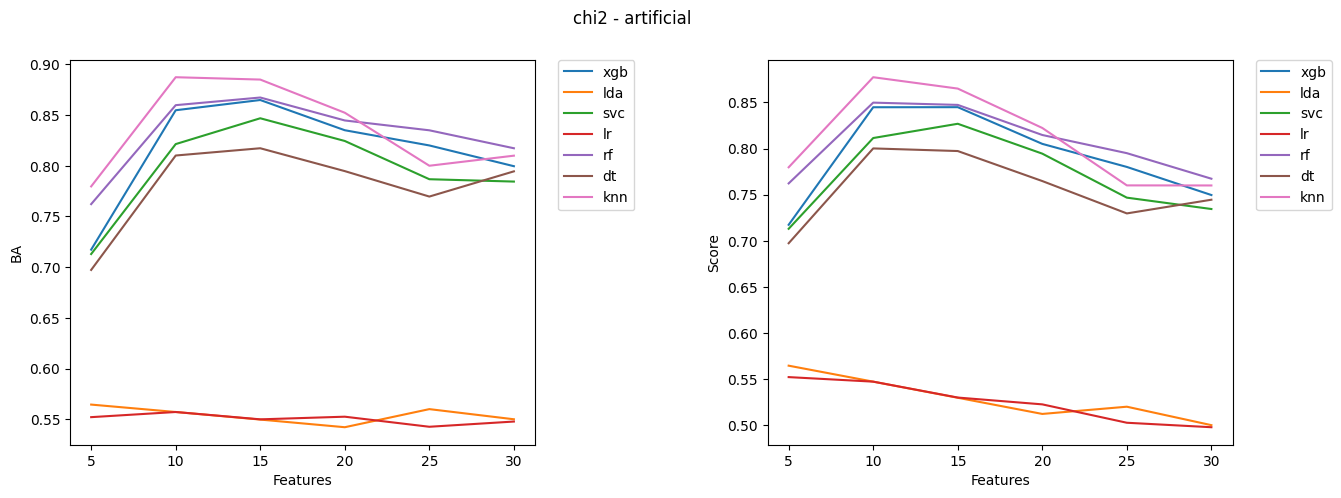

In [ ]:
end_scores_chi2_spam = search_best_features([5, 10, 15, 20, 25, 30], 'chi2', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
plot_results(end_scores_chi2_spam, "chi2 - spam")

Fitting estimator with 500 features.
Fitting estimator with 490 features.
Fitting estimator with 480 features.
Fitting estimator with 470 features.
Fitting estimator with 460 features.
Fitting estimator with 450 features.
Fitting estimator with 440 features.
Fitting estimator with 430 features.
Fitting estimator with 420 features.
Fitting estimator with 410 features.
Fitting estimator with 400 features.
Fitting estimator with 390 features.
Fitting estimator with 380 features.
Fitting estimator with 370 features.
Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
F

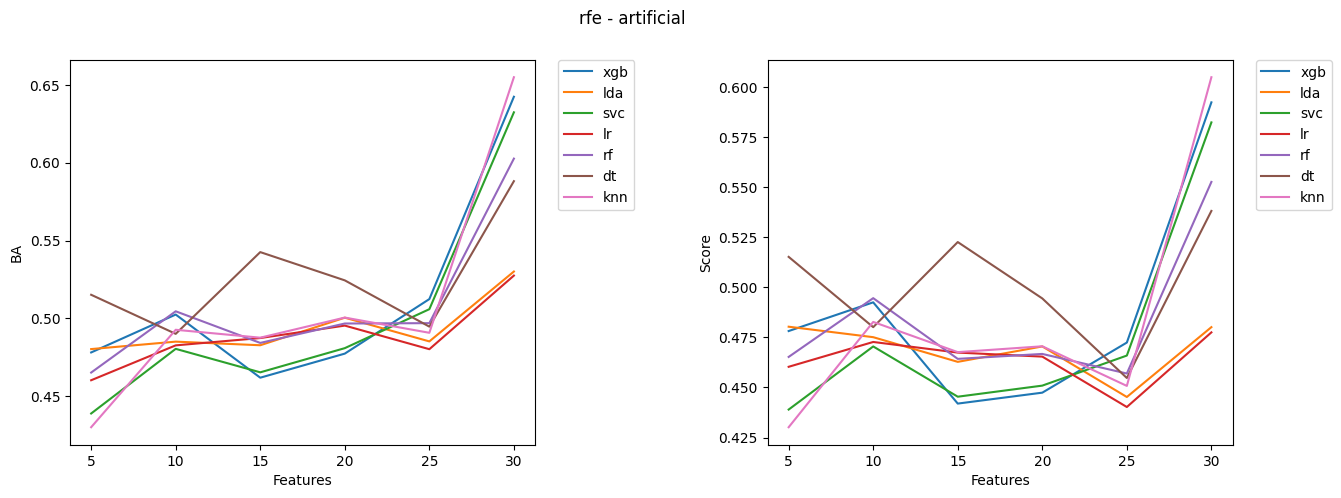

In [ ]:
end_scores_rfe_spam = search_best_features([5, 10, 15, 20, 25, 30], 'rfe', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
plot_results(end_scores_rfe_spam , "rfe - spam")

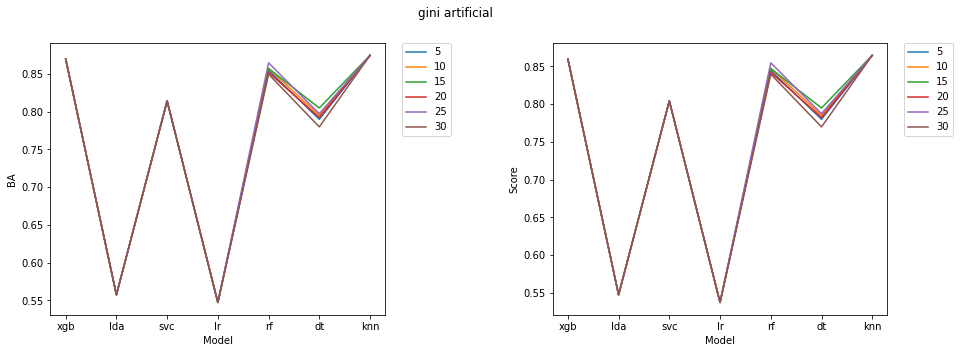

In [ ]:
end_scores_gini_spam = search_best_features([5, 10, 15, 20, 25, 30], 'gini', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
plot_results(end_scores_gini_spam = "gini - spam")

For L1 we look for best C value instead of number of features - the smaller the C the fewer features selected.

In [ ]:
end_scores_sbs_spam = search_best_C([0.005, 0.01, 0.015, 0.02, 0.025, 0.03], 'l1', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
plot_results(end_scores_sbs_spam = "l1 - spam")

#### Train models, compare and choose the best for each problem to predict

In [227]:
last_comparison_artificial=pd.DataFrame(index=['chi2', 'gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [228]:
#boruta
last_comparison_artificial.loc['boruta']= [0.879673, 0.847673, 'rf']

In [229]:
# chi2
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, 10)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

model = 'knn'
BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
last_comparison_artificial.loc['chi2']=[BA, score, model]

In [230]:
# gini
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_to_select=5)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

model = 'knn'
BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
last_comparison_artificial.loc['gini']=[BA, score, model]

In [231]:
last_comparison_artificial #best is boruta with rf

,BA,Score,Model
chi2,0.789578,0.759578,knn
gini,0.707097,0.707097,knn
boruta,0.879673,0.847673,rf


Spam

In [232]:
last_comparison_spam=pd.DataFrame(index=['chi2', 'rfe','gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [233]:
#boruta
last_comparison_spam.loc['boruta']= [0.867583, 0.867583, 'knn']

In [234]:
#chi 2
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_chi2, spam_train_y, spam_val_X_chi2, spam_val_y, 'spam')
last_comparison_spam.loc['chi2']=[BA, score, model]

In [239]:
%%capture
#rfe
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_val_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_rfe, spam_train_y, spam_val_X_rfe, spam_val_y, 'spam')
last_comparison_spam.loc['rfe']=[BA, score, model]

In [235]:
#gini
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y, depth=3, if_less=True, num_to_select=100)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_gini, spam_train_y, spam_val_X_gini, spam_val_y, 'spam')
last_comparison_spam.loc['gini']=[BA, score, model]

In [240]:
last_comparison_spam #chi2 with svc is the best

,BA,Score,Model
chi2,0.95583,0.95583,svc
rfe,0.939809,0.939809,svc
gini,0.937874,0.937874,svc
boruta,0.867583,0.867583,knn


predict for artificial test data for the best model

In [242]:
art_model = RandomForestClassifier()
art_model.fit(art_train_X_boruta2, art_train_y)
art_test_y_pred_proba=art_model.predict_proba(art_test_data_boruta2)

In [247]:
prob_test_art=art_test_y_pred_proba[:,1]

In [253]:
features_art=np.array(art_train_X_boruta2.columns)

In [257]:
features_art

array([ 28,  48,  64, 105, 128, 153, 204, 241, 281, 318, 336, 338, 378,
       424, 433, 442, 451, 453, 472, 475, 493], dtype=int64)

In [255]:
#save to txt files
np.savetxt('AGAKAC_artificial_prediction.txt', prob_test_art)
np.savetxt('AGAKAC_artificial_features.txt', features_art)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie

predict for spam test data for the best model

In [260]:
spam_model = SVC(probability=True)
spam_model.fit(spam_train_X_chi2, spam_train_y)
spam_test_y_pred_proba=spam_model.predict_proba(spam_test_data_chi2)
spam_test_y_pred=spam_model.predict(spam_test_data_chi2)

In [263]:
prob_test_spam=spam_test_y_pred_proba[:,1]

In [269]:
features_spam=np.where(spam_train_X_chi2_features==True)[0]


In [272]:
features_spam

array([   0,   41,  219,  220,  228,  244,  254,  256,  260,  265,  269,
        293,  316,  339,  462,  463,  464,  536,  552,  601,  604,  765,
        915, 1008, 1036, 1039, 1040, 1281, 1444, 1446, 1461, 1508, 1647,
       1679, 1691, 1701, 1716, 1721, 1754, 1780, 1791, 1888, 1919, 2215,
       2373, 2467, 2703, 2735, 2832, 2951, 3199, 3381, 3625, 3627, 3648,
       3737, 3846, 4099, 4100, 4104, 4204, 4249, 4338, 4347, 4486, 4493,
       4527, 4640, 4753, 4819, 4890, 4893, 4998, 5030, 5079, 5165, 5231,
       5310, 5430, 5459, 5865, 5956, 6131, 6289, 6290, 6409, 6415, 6417,
       6434, 6486, 6502, 6539, 6577, 6623, 6733, 6803, 6814, 6841, 6856,
       6912], dtype=int64)

In [273]:
#save to txt files
np.savetxt('AGAKAC_spam_prediction.txt', prob_test_spam)
np.savetxt('AGAKAC_spam_features.txt', features_spam)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie